In [1]:
import pandas as pd      #IMPORTANTE NO OLVIDAR ヽ(•‿ •)ノ
import numpy as np
pd.set_option("display.max_rows", 9) # Especificar el número de filas a mostrar
from scipy import stats # importando scipy.stats
%matplotlib inline
import matplotlib.pyplot as plt # importando matplotlib
from matplotlib.ticker import NullFormatter
import seaborn as sns # importando seaborn
import calendar
plt.style.use('seaborn-whitegrid') # Se define el estilo, en este caso se elige la visualización clásica de Matlab

# PCA VENTAS, EXPORTACIONES y VLR.AGREGADO

https://data-speaks.luca-d3.com/2018/06/python-para-todos-tutorial-de-pca-en-5.html
https://github.com/mGalarnyk/Python_Tutorials/blob/master/Sklearn/PCA/PCA_Data_Visualization_Iris_Dataset_Blog.ipynb
https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60

Los 6 pasos del proceso PCA.

Los pasos que vamos a dar y que explicaremos detalladamente son los siguientes:
1. Cargar los datos
2. Seleccionar las variables de la matriz
3. Normalizar los datos
4. Proyección PCA a 2D
5. Visualizar Proyección 2D

In [2]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

# Paso 1

In [3]:
total=pd.read_excel("TOTALULIMPIO1.xlsx",index_col=0) #Recursos:amarillo #Capacidades:rojo #Resultados:azul
total

,ESTABLECIMIENTO,DPTO,CIIU,PERIODO,SOCIOS,PERMANENTE,APRENDIZ,PROD_NAL,PROD_EXT,OBRERO,...,PROD_BRUTA,PROD_INDUST,INVERBRUTA,TEMPORALDIRECTO,PERMANENTE.1,VAL_AGREGADO,MPCOMPRADA,COMPRAS_MP_EXTERIOR,EXPORTACIONES,VENTAS
EMPRESA,,,,,,,,,,,,,,,,,,,,,
145973,145898,11,1810,2008,0,2,0,2,0,10,...,3525900,3525900,0,0,2,912761,2602400,0,0,3460300
145979,145904,11,1810,2008,2,7,0,0,0,3,...,296411,296411,9406,0,7,122106,102941,0,0,296411
145987,145912,11,1810,2008,0,0,0,1,0,30,...,1594496,1594496,3200,46,0,366562,867491,0,194621,1597520
145988,145913,11,1741,2008,1,0,0,2,0,3,...,166200,166200,-2000,0,0,92868,26720,0,0,231480
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
987525,987525,8,139,2016,0,0,4,7,0,53,...,11257778,11907721,25885,84,0,3431145,4925968,0,654653,11002090
987529,987529,8,139,2016,0,18,1,1,0,24,...,1554335,1566400,0,0,18,794639,279709,244803,0,1657388
987530,987530,8,139,2016,0,65,3,31,0,512,...,86282095,85785462,262072,2,65,22787632,46732723,2530882,49583775,85991402
987533,987533,8,139,2016,0,10,2,6,0,49,...,7892838,7892838,0,36,10,3682753,4038309,0,0,8600884


# Paso 2

In [4]:
# Se divide la matriz del dataset en dos partes
variables = ['VAL_AGREGADO', 'EXPORTACIONES', 'VENTAS']
x = total.loc[:,variables].values # Separando las características

In [5]:
#NO SE QUE PONER AQUÍ
y = total.loc [:, ['PERIODO']].values # Separando el objetivo 

# Paso 3

Normalización

La PCA se efectúa por escala, por lo que necesita escalar las funciones de sus datos antes de aplicar la PCA. Use StandardScaler para ayudarlo a estandarizar las características del conjunto de datos en la escala de la unidad (media = 0 y varianza = 1), que es un requisito para el rendimiento óptimo de muchos algoritmos de aprendizaje automático.

In [6]:
from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(x) # Normalizar/Estandarizar las características

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [9]:
pd.DataFrame(data = x, columns = variables).head(11645)

,VAL_AGREGADO,EXPORTACIONES,VENTAS
0,-0.214552,-0.182652,-0.154551
1,-0.283089,-0.182652,-0.273209
2,-0.261899,-0.154769,-0.224413
3,-0.285624,-0.182652,-0.275645
...,...,...,...
11641,0.003753,-0.088860,0.128297
11642,-0.224791,-0.182652,-0.222167
11643,1.681659,6.921218,2.940697
11644,0.025563,-0.182652,0.038242


# Paso 4

In [7]:
pca = PCA(n_components=2)

In [8]:
principalComponents = pca.fit_transform(x)

In [9]:
totalprincipal = pd.DataFrame(data = principalComponents
             , columns = ['Componente principal 1', 'Componente principal 2' ])
totalprincipal.head(11645)

,Componente principal 1,Componente principal 2
0,-0.317306,-0.007456
1,-0.430255,0.054845
2,-0.373171,0.055930
3,-0.433236,0.056693
...,...,...
11641,0.033802,-0.105722
11642,-0.364739,0.013506
11643,6.449244,4.217242
11644,-0.058144,-0.173647


In [10]:
establecimiento=total[['ESTABLECIMIENTO']].head(11645)
establecimiento

,ESTABLECIMIENTO
EMPRESA,
145973,145898
145979,145904
145987,145912
145988,145913
...,...
987525,987525
987529,987529
987530,987530
987533,987533


In [11]:
totalprincipal.reset_index(drop=True, inplace=True) 
establecimiento.reset_index(drop=True, inplace=True) 
final = pd.concat([totalprincipal, establecimiento], axis=1)
final

,Componente principal 1,Componente principal 2,ESTABLECIMIENTO
0,-0.317306,-0.007456,145898
1,-0.430255,0.054845,145904
2,-0.373171,0.055930,145912
3,-0.433236,0.056693,145913
...,...,...,...
11641,0.033802,-0.105722,987525
11642,-0.364739,0.013506,987529
11643,6.449244,4.217242,987530
11644,-0.058144,-0.173647,987533


# Paso 5

Visualización 2D proyección

In [ ]:
total['P1'] = principalComponents[:,0] 
total['P2'] = principalComponents[:,1]
#Visualizacion
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Componente principal 1', fontsize = 15)
ax.set_ylabel('Componente principal 2', fontsize = 15)
ax.set_title('2 Componentes PCA Resultados Financieros', fontsize = 20)

empresas = ['987533', '987530', '987525']
colors = ['r', 'g', 'b']
for empresa, color in zip(empresas,colors):
    indicesToKeep = total['ESTABLECIMIENTO'] == empresa
    ax.scatter(final.loc[indicesToKeep, 'Componente principal 1']
               , final.loc[indicesToKeep, 'Componente principal 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

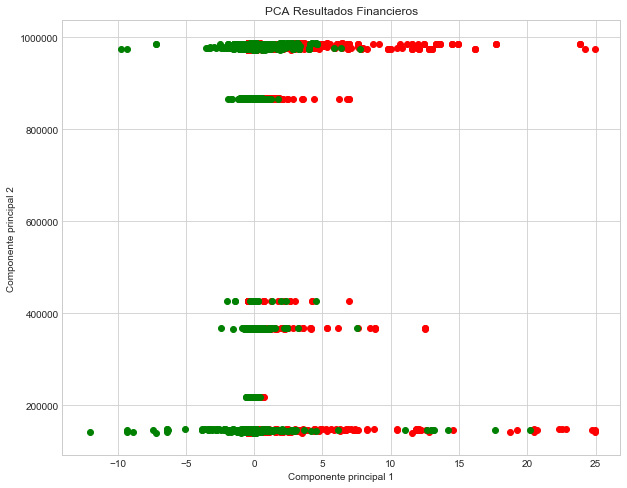

In [39]:
plt.figure(figsize=(10,8))
plt.scatter(final['Componente principal 1'],final['ESTABLECIMIENTO'], c='red')
plt.scatter(final['Componente principal 2'],final['ESTABLECIMIENTO'], c='green')

plt.title('PCA Resultados Financieros')
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.show()

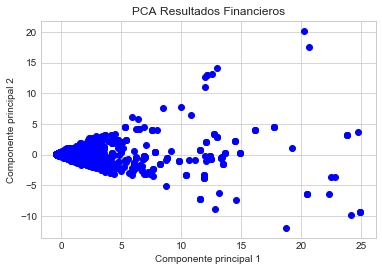

In [40]:
plt.scatter(final['Componente principal 1'],final['Componente principal 2'], c='blue')

plt.title('PCA Resultados Financieros')
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


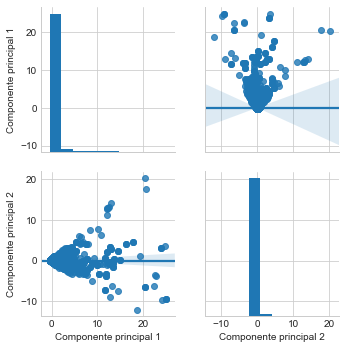

In [14]:
b = sns.pairplot(final, vars=["Componente principal 1","Componente principal 2"],kind="reg") 
b # Resumen gráfico con histogramas y diagramas de dispersión de las variables

In [48]:
pca.explained_variance_ratio_

array([0.84741513, 0.13890798])

Los dos primeros componentes principales contienen el 98.6% de la información. El primer componente principal contiene 84.7% de la varianza y el segundo componente principal contiene 13.9% de la varianza. El tercer y cuarto componente principal contiene el resto de la varianza del conjunto de datos.

# OTROS

In [ ]:
import sklearn.decomposition as deco
import numpy as np

x = (x - np.mean(x, 0)) / np.std(x, 0) # You need to normalize your data first
pca = PCA(n_components=2) # n_components is the components number after reduction
x_r = pca.fit(x).transform(x)
print ('explained variance (first %d components): %.2f'%(n_components, sum(pca.explained_variance_ratio_)))